# Appendix E: Non-ideal op amps

In this notebook we go a little bit further than [Appendix A](./appendix-A-op-amp.ipynb) and consider the _speed_ of an op amp, using some of the concepts from [Appendix D](./appendix-D-laplace-and-filters.ipynb).

Analysis of non-ideal op amps is usually divided into two parts:
- In the _small signal_ range the amplifier acts "linearly": its gain within this range does not depend on the absolute values of $V_+$ and $V_-$, and there are no history effects.
- In the _large signal_ range, everything gets more complicated: the amp moves towards its intended amplification with a finite "slew rate", it can saturate and then needs to recover, oscillations occur etc.

For our purposes, it should be easy to choose an op amp that we can use within its small signal range, so **we fill focus on small signal only**.
The large signal case is much more interesting, so be aware when searching the literature that unless stated otherwise they are probably going for the large signal case.
Similarly, almost everything you find about op-amps is in terms of their _frequency response_, while for patch-clamp we are almost exclusively interested in their _transient_ response.

## Feedback amplifier: general equation

Given any amplifier with an _open-loop gain_ $A_{OL}$ such that $V_\text{out} = A_\text{OL} V_\text{in}$, we can write an expression for the [gain reduction](https://en.wikipedia.org/wiki/Negative-feedback_amplifier) when some portion $\beta$ of the output is fed back into the input.
If this is negative feedback, we can write it as $-\beta V_\text{out}$ to get

\begin{align}
V_\text{out} = A_\text{OL}\left( V_\text{in} - \beta V_\text{out} \right)
\end{align}
to find
\begin{align}
A_\text{FB} = \frac{V_\text{out}}{V_\text{in,CL}} = \frac{A_\text{OL}}{1 + \beta A_\text{OL}}
\end{align}

where $A_\text{FB}$ is the _closed-loop gain_.
For a large open-loop gain, we obtain $A_\text{FB} = \frac{1}{1/A_\text{OL} + \beta} \approx 1 / \beta$.

### $V_\text{in}$ for open and closed-loop is not always the same

The above notation works well for block diagrams, as shown on the left in the figure below:

<img src="resources/op-amp-3-generic.png" />

But when we use $V_\text{in}$ for op amps, we need to be a bit careful about how we define it.

For the open-loop case, we can use either $V_\text{in} = V_+ - V_-$, or $V_\text{in} = V_+,\, V_- = 0$, where the first version is more general and seems to be preferred.

For the closed-loop configuration we have to use $V_\text{in} = V_+$.

Using the above definition, we get

\begin{align}
V_\text{out} = \frac{A}{1 + \left(\frac{R_2}{R_1 + R_2}\right) A} V_\text{in}
\end{align}
or
\begin{align}
\beta = \frac{R_2}{R_1 + R_2}
\end{align}

for the non-inverting negative feedback op amp with finite gain.

## Dominant pole approximation

Op-amps are complex devices that have a very non-trivial transfer function.
However, to simplify their analysis and use, they are commonly designed to have a _dominant pole_, so that we can approximate their transfer function with a _dominant pole approximation_.

For op-amps, a commonly used approximate transfer function is that of a low-pass filter (see [Appendix C](./appendix-C-laplace-and-filters.ipynb)), with an additional amplification factor $A_0$:

\begin{align}
H(s) = \frac{V_\text{out}}{V_\text{in}} = A_\text{OL}(s) = \frac{A_0}{1 + s/\omega_c}
\end{align}

where $\omega_c$ is the [corner frequency](https://en.wikipedia.org/wiki/Cutoff_frequency) (the frequency at which the response begins to change dramatically).
For op-amps and low-pass filters, the corner frequency is also the [bandwidth](https://en.wikipedia.org/wiki/Bandwidth_(signal_processing)) (the range of frequencies that are let through without more than a factor $1/\sqrt{2}$ loss of gain).

### Closed-loop response

Combining the above equations (just like on [wikipedia](https://en.wikipedia.org/wiki/Negative-feedback_amplifier)) we find:

\begin{align}
A_\text{FB}(s) 
    &= \frac{A_\text{OL}(s)}{1 + \beta A_\text{OL}} \\
    &= \frac{A_0 / (1 + i s/\omega_c)}{1 + \beta A_0 / (1 + i s/\omega_c)} \\
    &= \frac{A_0}{(1 + i s/\omega_c) + \beta A_0 }
    = \frac{A_0}{i s/\omega_c + (1 + \beta A_0) } \\
    &= \left( \frac{A_0}{1 + \beta A_0}\right) \frac{1}{1 + i s/((1 + \beta A_0) \omega_c) } \\
\end{align}

which shows that the response is still a single pole one.
However, the gain has been reduced by a factor $1 + \beta A_0$ while the cutoff frequency (or bandwidth) is increased by a factor $1 + \beta A_0$.
This is known as the gain-bandwidth trade-off.

### Bode plot / frequency response

In Appendix C, we saw that systems with a transfer function
$$H(s) = \frac{\omega_c}{s + \omega_c}$$
have a frequency response with gain
\begin{align}
|H(i\omega)|
    = \frac{\omega_c}{\sqrt{\omega_c^2 + \omega^2}}
    = \frac{1}{\sqrt{1 + (\omega/\omega_c)^2}}
\end{align}

This lets us draw the top-half of a Bode plot for the open-loop configuration:

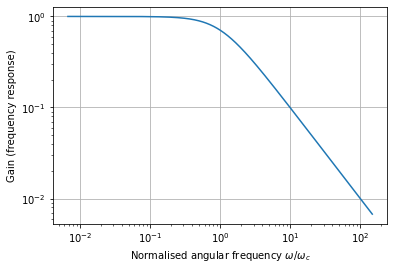

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Normalised angular frequency $\omega/\omega_c$')
ax.set_ylabel('Gain (frequency response)')
ax.grid()

lo, hi = np.log10(1e-5), np.log10(1e5)
w = np.logspace(lo, hi, 1001, base=np.e)
g = 1 / np.sqrt(1 + w**2)
ax.plot(w, g)

plt.show()

Now we can apply our equation using $A_0 = 1$ and $\beta = 9$ to find the closed-loop equivalent:

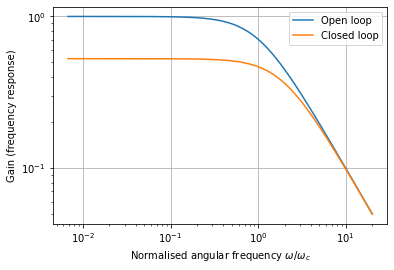

In [2]:
a = 1
beta = 0.9

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Normalised angular frequency $\omega/\omega_c$')
ax.set_ylabel('Gain (frequency response)')
ax.grid()

lo, hi = np.log10(1e-5), np.log10(1e3)
w = np.logspace(lo, hi, 1001, base=np.e)
g0 = 1 / np.sqrt(1 + (w / 1)**2)
g1 = (a / (1 + beta * a)) / np.sqrt(1 + (w / (1 + beta * a))**2)
ax.plot(w, g0, label='Open loop')
ax.plot(w, g1, label='Closed loop')
ax.legend()

plt.show()

From all this, we conclude that we can handle the open loop and the non-inverting closed-loop configurations with the same equations.

## Op amp step response

Assuming a dominant pole, we can write the step response as

\begin{align}
Y(s) = H(s) U(s) 
    &= A_0 \frac{\omega_c}{s + \omega_c} \frac{V_\text{in}}{s} \\
    &= A_0 V_\text{in} \frac{\omega_c}{s(s + \omega_c)}
\end{align}

where we have assumed $U(s)$ is a step function ($1/s$) scaled by the constant _input voltage_ $V_\text{in} = V_+ - V_-$.
We also assume that $y(0) = 0$.
We can translate this back using [a table](https://en.wikipedia.org/wiki/List_of_Laplace_transforms) to find

\begin{align}
y(t) = A_0 V_\text{in} (1 - e^{-\omega_c t})
\end{align}

This means that, if $\omega_c$ is a large enough number, $y(t) = V_\text{out}$ rapidly settles at

\begin{align}
V_\text{out} = A_0 (V_+ - V_-)
\end{align}

## Equation used in Sigworth papers

To model an op amp with a finite speed, [Sigworth 1995a](https://doi.org/10.1007/978-1-4419-1229-9_4) uses the equation

\begin{align}
\frac{d}{dt} V_\text{out} = \omega_A (V_+ - V_-) = \frac{V_+ - V_-}{\tau_a}
\end{align}

where $\omega_A = 1/\tau_a$ is the gain-bandwidth product (GBP) in radians, so $\omega_A = 2 \pi f_A$ for the more common representation in Hz.

**I'm not sure where this equation is from**, and can't find it in popular op-amp books (which are more about frequency response, large signal deviations, or things you can build with op amps).

It makes some intuitive sense: $V_\text{out}$ will increase as long as $V_- < V_+$, and decrease when $V_- > V_+$, so connecting $V_\text{out}$ to $V_-$ should indeed give us a feedback amplifier that tries to make $V_-$ equal $V_+$ with some delay determined by $\tau_a$.
However, in an open-loop configuration with $V_+ \neq V_-$ the equation predicts an infinitely increasing gain.

A deduction might be be something like this:
Starting from

\begin{align}
V_\text{out} = A_0 V_\text{in} (1 - e^{-\omega_c t})
\end{align}

We can assume a constant $V_\text{in}$ and take the derivative to find

\begin{align}
\frac{d}{dt} V_\text{out} = A_0 \omega_c V_\text{in} e^{-\omega_c t} = \omega_A (V_+ - V_-) e^{-\omega_c t}
\end{align}

Then, for very small $t$ you could assume that $\dot{V}_\text{out} \approx A_0 \omega_c V_\text{in} = \omega_A (V_+ - V_-)$.
Alternatively, you could introduce the "no saturation" condition as a simplification that removes the $e^{-\omega_c t}$ term.

Example figures in Sigworth 1995a use $\tau_a = 16 \text{ns} = 0.016 \mu\text{s}$.

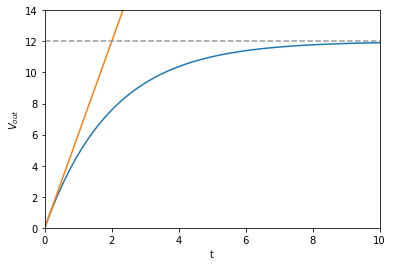

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('t')
ax.set_ylabel('$V_{out}$')

a = 4
v_in = 3
w = 0.5

t = np.linspace(0, 10, 101)
v = a * v_in * (1 - np.exp(-w*t))
d = a * w * v_in

ax.plot(t, v)
ax.plot(t, t * d)
ax.axhline(12, color='#999', ls='--')
ax.set_xlim(0, 10)
ax.set_ylim(0, 14)

plt.show()

The above example, with some arbitrary values for the constants, shows that this is a reasonable approximation for maybe the first 5% of the response _in an open-loop configuration_.
Not sure how or if to extend this to a closed-loop sanity check.

### Analysis using Sigworth's equation

Given the equation above, we now repeat the analysis of the patch clamp amplifier's "bandwidth" shown in [Sigworth 1995a](https://doi.org/10.1007/978-1-4419-1229-9_4), but using the symbols shown below:

<img src="resources/patch-amp-5-Cp.png" />

First, let

\begin{align}
I     &= I_{Cf} + I_{Rf} - I_{Cp} \\
      &= C_f (\dot{V}_o - \dot{V}_p) + \frac{V_o - V_p}{R_f} - C_p \dot{V}_p \\
R_f I &= R_fC_f (\dot{V}_o - \dot{V}_p) + V_o - V_p - R_fC_p \dot{V}_p
\end{align}

Next, by treating $V_c$ as a constant we get

\begin{align}
V_\text{out} \equiv V_o - V_c \quad \longrightarrow \quad \dot{V}_o = \dot{V}_\text{out}
\end{align}

and using the equation for op-amps introduced above

\begin{align}
\tau_a \dot{V}_\text{out} = V_c - V_p \quad \longrightarrow \quad 
    & V_p = -\tau_a \dot{V}_\text{out} \\
    & \dot{V}_p = -\tau_a \ddot{V}_\text{out}
\end{align}
for

\begin{align}
R_f I &= R_fC_f (\dot{V}_\text{out} + \tau_a \ddot{V}_\text{out}) + V_\text{out} + \tau_a \dot{V}_\text{out} + R_fC_p \tau_a \ddot{V}_\text{out} \\
&= \tau_a R_f(C_f + C_p) \ddot{V}_\text{out} + (R_fC_f+ \tau_a) \dot{V}_\text{out} + V_\text{out} \\
&= \tau_a R_f C_t \ddot{V}_\text{out} + (\tau_a + \tau_f) \dot{V}_\text{out} + V_\text{out}
\end{align}

where the last step defines $\tau_f = R_fC_f$ and $C_t = C_f + C_p$.

This leads to a transfer function

\begin{align}
H(s) = \frac{V_\text{out}}{I(s)} 
     &= \frac{R_f}{\tau_aR_fC_ts^2 + (\tau_a + \tau_f)s + 1} \\
\end{align}

#### The patch-clamp amp as a damped harmonic oscillator

We described $C_f$ as a "stray capacitance", but mentioned that [Weerakoon et al., 2009](https://doi.org/10.1109/TBCAS.2008.2005419) introduced an extra $C_f$ as a stability measure.
To see why, we can equate the transfer function above to the damped harmonic oscillator equation (see [Appendix C](./appendix-C-laplace-and-filters.ipynb)):

$$ H(s) = R_f \frac{1}{\tau_0^2s^2 + 2\zeta\tau_0s + 1} $$
with
$$ \tau_0 = \sqrt{\tau_aR_fC_t} $$
and
$$ \zeta = \frac{1}{2}\frac{\tau_a + \tau_f}{\tau_0} $$

Now if we use $\tau_a \ll 1$ we get 
$$
\zeta \approx \frac{1}{2}\frac{\tau_f}{\omega_0} = \frac{1}{2}\sqrt{\frac{R_f}{\tau_a}} \frac{C_f}{\sqrt{C_f + C_p}}
$$

From this we can see that making $C_f$ smaller and smaller will eventually lead to $\zeta < 1$, which creates overshoot and oscillations in the amplifier's step response.
An example, using the step response equations straight from [wikipedia](https://en.wikipedia.org/wiki/Harmonic_oscillator#Step_input):

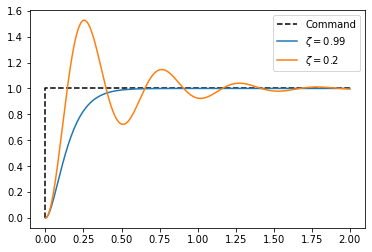

In [4]:
tau0_in_s = np.sqrt(1.6e-10)  # Roughly based on Sigworth figure 2
tau0 = tau0_in_s * 1e3        # Convert to ms
w0 = 1 / (2 * np.pi * tau0)   # Angular frequency

def v(z):
    phi = np.arccos(z)
    return 1 - np.exp(-z * w0 * t) / np.sin(phi) * np.sin(np.sqrt(1 - z**2) * w0 * t + phi)

t = np.linspace(0, 2, 1001)
v1 = v(0.99)
v2 = v(0.2)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 0, t[-1]], [0, 1, 1], 'k--', label='Command')
ax.plot(t, v1, label='$\zeta = 0.99$')
ax.plot(t, v2, label='$\zeta = 0.2$')
ax.legend()
plt.show()

This damped oscillating response to a step function is known as [ringing](https://en.wikipedia.org/wiki/Ringing_(signal)).

#### Now what?

Since the patch-clamp amplifier is all about a good transient response, and since we can get ringing with a very low $C_f$, the solution to building good patch clamp amplifiers is not to make $C_f$ as low as possible.
In fact, in [Weerakoon et al., 2009](https://doi.org/10.1109/TBCAS.2008.2005419) a resistor $R_f$ is used with a very low stray capacitance, necessitating the introduction of an extra capacitator to achieve a large enough $C_f$.

Instead, another "dominant pole" trick is used.
To see how, we rewrite the original transfer function in terms of two new poles $-1/\tau_1$ and $-1/\tau_2$:

\begin{align}
H(s) = \frac{V_\text{out}}{I(s)} 
     &= \frac{R_f}{\tau_aR_fC_ts^2 + (\tau_a + \tau_f)s + 1} \\
     &= \frac{R_f}{(\tau_1s + 1)(\tau_2s + 1)} \\
\end{align}

We can find $\tau_1$ and $\tau_2$ using the quadratic equation, but it's actually more informative to approximate them.
To do this, we equate the denominators

$$ \tau_1\tau_2s^2 + (\tau_1 + \tau_2)s + 1 = \tau_aR_fC_ts^2 + (\tau_a + \tau_f)s + 1 $$

Now if $\tau_a \ll \tau_f$ we have $\tau_a + \tau_f \approx \tau_f$.
The goal is to create a dominant pole with $\tau_1 \gg \tau_2$, so we can also assume $\tau_1 + \tau_2 \approx \tau_1$ and so

$$ \tau_1 \approx \tau_f = R_f C_f$$

Filling that in into $\tau_1\tau_2 = \tau_aR_fC_t$ we get

$$ \tau_2 \approx \tau_a \frac{C_t}{C_f}$$

By making $C_f$ larger, we make $\tau_1$ larger and $\tau_2$ smaller.
The trick then, used by Sigworth in his design, is (1) to choose $C_f$ such that $\tau_2$ is much shorter than the phenomena of interest so that we can usually ignore it, and (2) to accept the effects of $\tau_1$ and deal with them in other ways (i.e. via $C_p$ compensation).
Note also that $\tau_f$ depends only on the patch clamp design, and not on the experiment-specific $C_t$.

## Equations used in Weerakoon et al. paper

The paper by [Weerakoon et al., 2009](https://doi.org/10.1109/TBCAS.2008.2005419) uses the equations

$$ V_\text{out} = \frac{I_\text{in} R_f}{1 + \tau_f s} $$

where $\tau_f = R_fC_f = 7.5\,\mu{s}$, and

$$ V_p = \frac{V_c}{1 + \tau_c s} $$

where $\tau_c = \tau_a\frac{C_t}{C_f} = 0.8\,\mu{s}$.

The first equation can be detransformed to

\begin{align}
R_fI_\text{in} = V_\text{out} + \tau_f \dot{V}_\text{out}
\end{align}

we can rewrite and divide by $R_f$ to find

\begin{align}
\dot{V}_\text{out} = \frac{R_fI_\text{in} - V_\text{out}}{\tau_f}
&&\longrightarrow&&
\dot{I}_\text{out} = \frac{I_\text{in} - I_\text{out}}{\tau_f}
\end{align}

which matches the statement that

> the resulting output [...] is low-pass filtered by the transconductor time constant [$\tau_f]$

(where we write $\tau_f$ instead of the paper's notation $\tau_z$).

The second equation can be translated to

\begin{align}
V_p + \tau_c \dot{V}_p = V_c
&& \longrightarrow &&
\dot{V}_p = \frac{V_c - V_p}{\tau_c}
\end{align}

in other words, it assumes that the voltage $V_p$ follows the input voltage $V_c$ with a delay set by the time constant $\tau_c$.

These equations appear to represent each pole of the original Sigworth equations, but now decoupled and no longer presented as an approximation.

## Equations used in Lei et al. papers

In [Lei et al., 2020](https://doi.org/10.1098/rsta.2019.0348) and subsequent work, we used the same equations as in Weerakoon:

\begin{align}
\dot{I}_\text{out} = \frac{I_\text{in} - I_\text{out}}{\tau_f}
\end{align}

and

\begin{equation}
\dot{V}_p = \frac{V_c - V_p}{\tau_c}
\end{equation}

Instead of an experiment-specific value which takes $C_p$ into account, we used a constant $\tau_c =0.8\,\mu s$.